In [ ]:
# Kpp on diabetes
# ahc on diabetes
# Compare sil score, dbi score, chi score

# kpp on body fat
# ahc on body fat 
# Compare sil score, dbi score, chi score

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# K++ vs AHC 

In [3]:
# Function to compare performance of K++ and AHC
def kpp_ahc_compare(k_clusters, ahc_clusters, X_pca):

    # Conducting K++
    kpp = KMeans(n_clusters=k_clusters, init="k-means++", n_init=10, random_state=42)
    kpp_labels = kpp.fit_predict(X_pca)
    kpp_sil = silhouette_score(X_pca, kpp_labels)
    kpp_dbi = davies_bouldin_score(X_pca, kpp_labels)
    kpp_chi = calinski_harabasz_score(X_pca, kpp_labels)

    # Conducting AHC
    ahc = AgglomerativeClustering(n_clusters=ahc_clusters, linkage="ward")
    ahc_labels = ahc.fit_predict(X_pca)
    ahc_sil = silhouette_score(X_pca, ahc_labels)
    ahc_dbi = davies_bouldin_score(X_pca, ahc_labels)
    ahc_chi = calinski_harabasz_score(X_pca, ahc_labels)

    return kpp_sil, kpp_dbi, kpp_chi, ahc_sil, ahc_dbi, ahc_chi

In [4]:
# Function to plot bar graphs for comparison
def bar_graph(dataset_name, scores):
    
    methods = ["K++", "AHC"]

    for metric, values in scores.items():
        plt.figure(figsize=(10, 6))
        bars = plt.bar(methods, values, width=0.5)
        
        plt.ylabel("Score value")
        plt.title(f"{dataset_name} - K++ vs AHC ({metric})")

        # Values above bars
        for bar in bars:
                y_val = bar.get_height()
                plt.text(bar.get_x() + bar.get_width()/2, y_val + 0.02 * y_val, f"{y_val:.3f}", ha="center", va="bottom", fontsize=9)

        plt.tight_layout()
        plt.show()


## Diabetes dataset

### Preprocess the dataset

In [5]:
# Load dataset
diab_df = pd.read_csv("diabetes_prediction_dataset.csv")
diab_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [6]:
# Taking only numeric columns
X_diab = diab_df.select_dtypes(include=[np.number]).copy()
X_diab = X_diab.loc[:, X_diab.nunique(dropna=False) > 1] # Drop constants if any

preprocess = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

X_diab_pre = preprocess.fit_transform(X_diab)
X_diab_pre

array([[ 1.69270354, -0.28443945,  4.93637859, ...,  1.00170572,
         0.04770422, -0.30478874],
       [ 0.53800643, -0.28443945, -0.20257766, ...,  1.00170572,
        -1.42620999, -0.30478874],
       [-0.61669069, -0.28443945, -0.20257766, ...,  0.16110802,
         0.48987848, -0.30478874],
       ...,
       [ 1.07094356, -0.28443945, -0.20257766, ...,  0.16110802,
         0.41618277, -0.30478874],
       [-0.7943364 , -0.28443945, -0.20257766, ..., -1.42668764,
        -0.93490525, -0.30478874],
       [ 0.67124071, -0.28443945, -0.20257766, ...,  1.00170572,
        -1.18055762, -0.30478874]])

In [7]:
# Sampling
sample_size = 20000

np.random.seed(42)
sample_idx = np.random.choice(len(X_diab_pre), size=sample_size, replace=False)

X_diab_sample = X_diab_pre[sample_idx]
X_diab_sample

array([[-1.2828621 , -0.28443945, -0.20257766, ...,  0.25450777,
        -0.2962091 , -0.30478874],
       [-1.72697637, -0.28443945, -0.20257766, ..., -0.49269019,
         0.1705304 , -0.30478874],
       [ 0.93770927, -0.28443945, -0.20257766, ..., -1.89368636,
         1.52161842, -0.30478874],
       ...,
       [ 0.31594929, -0.28443945, -0.20257766, ..., -0.67948968,
        -0.93490525, -0.30478874],
       [ 1.38182355, -0.28443945,  4.93637859, ...,  1.00170572,
        -0.93490525, -0.30478874],
       [ 0.04948073, -0.28443945, -0.20257766, ...,  0.25450777,
         0.1705304 , -0.30478874]])

In [8]:
# PCA reduction 
pca_diab = PCA(n_components=2, random_state=42)
X_pca_diab = pca_diab.fit_transform(X_diab_sample)
X_pca_diab

array([[-1.20436699,  0.9762225 ],
       [-1.47119775,  1.02308106],
       [-0.08712889, -0.53057882],
       ...,
       [-0.77443269, -0.78898066],
       [ 1.56506571, -1.86741497],
       [-0.29962083,  0.38425597]])

### K++ vs AHC performance

In [9]:
kpp_sil_diab, kpp_dbi_diab, kpp_chi_diab, ahc_sil_diab, ahc_dbi_diab, ahc_chi_diab = kpp_ahc_compare(k_clusters=2, ahc_clusters=2, X_pca=X_pca_diab) # Using optimal parameters found in individual simulations

print(f"K++ | Silhouette score: {kpp_sil_diab:.3f}, Davies-Bouldin score: {kpp_dbi_diab:.3f}, Calinski-Harabasz score: {kpp_chi_diab:.3f}")
print(f"AHC | Silhouette score: {ahc_sil_diab:.3f}, Davies-Bouldin score: {ahc_dbi_diab:.3f}, Calinksi-Harabasz score: {ahc_chi_diab:.3f}")


K++ | Silhouette score: 0.612, Davies-Bouldin score: 0.681, Calinski-Harabasz score: 14719.340
AHC | Silhouette score: 0.618, Davies-Bouldin score: 0.616, Calinksi-Harabasz score: 14416.955


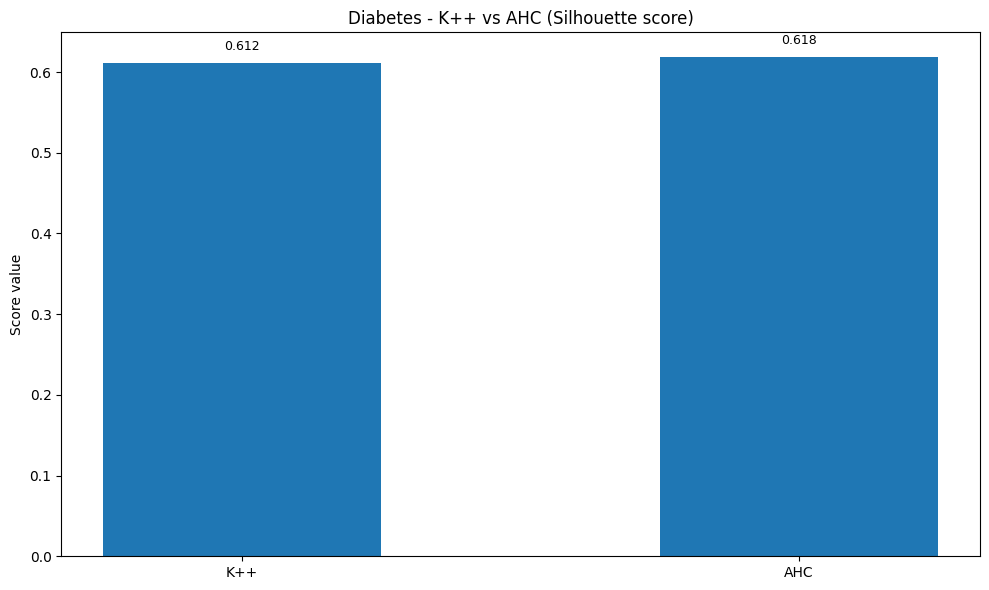

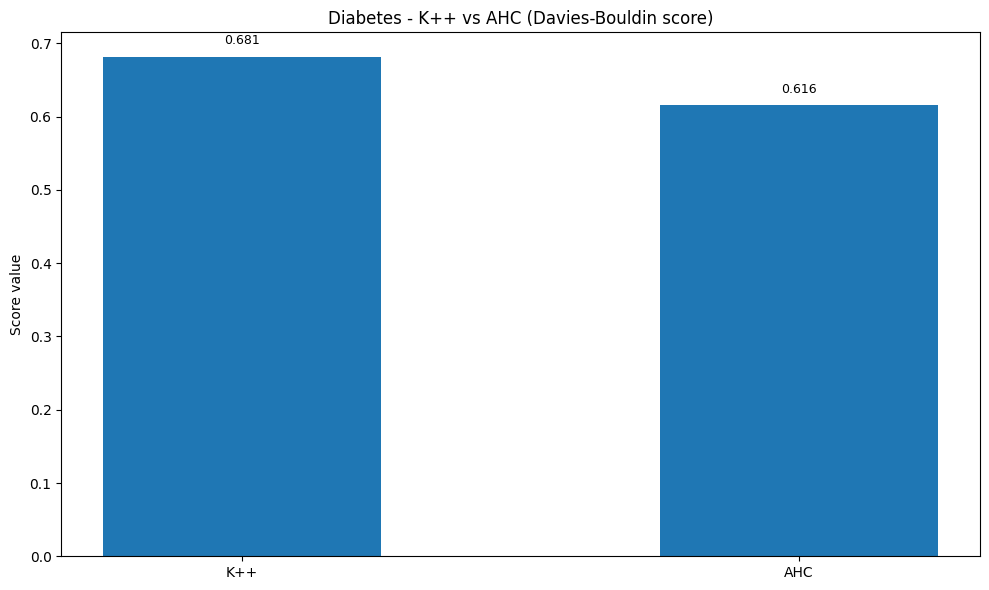

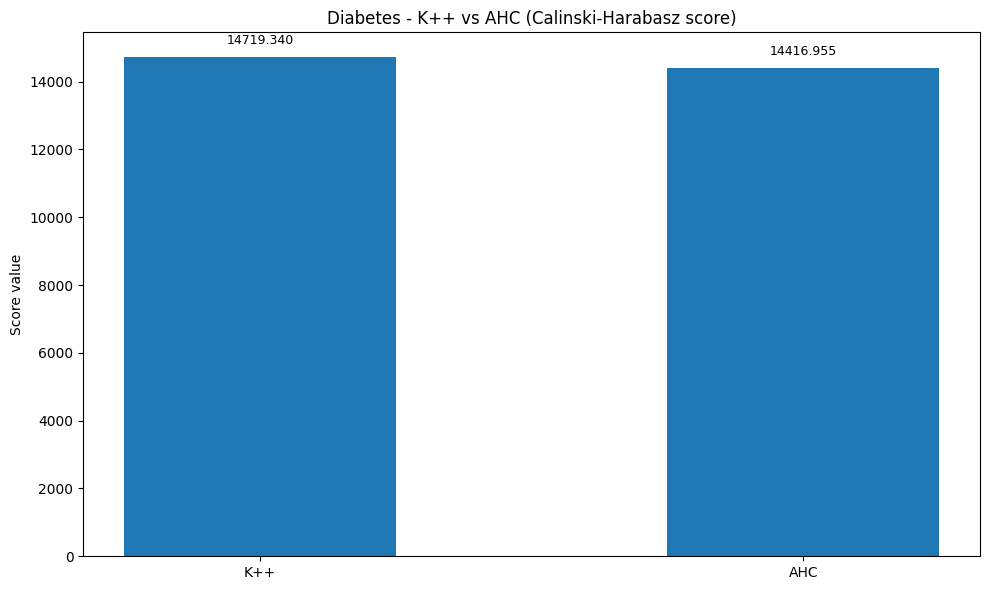

In [10]:
# Plot bar graph for visual comparison
diab_scores = {
    "Silhouette score": [kpp_sil_diab, ahc_sil_diab],
    "Davies-Bouldin score": [kpp_dbi_diab, ahc_dbi_diab],
    "Calinski-Harabasz score": [kpp_chi_diab, ahc_chi_diab]
}

bar_graph(dataset_name="Diabetes", scores=diab_scores)

## Body Fat dataset

### Preprocess the dataset

In [12]:
bf_df = pd.read_csv("bodyfat.csv")
bf_df

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,88.8,49.6,34.8,21.5,25.6,25.7,18.5
248,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,104.5,59.6,40.8,23.2,35.2,28.6,20.1
249,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,101.7,60.3,37.3,21.5,31.3,27.2,18.0
250,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,97.8,56.0,41.6,22.7,30.5,29.4,19.8


In [13]:
X_bf = bf_df.drop(columns=["BodyFat"])
bf_scaler = StandardScaler()
X_bf_scaled = bf_scaler.fit_transform(X_bf)

print(X_bf_scaled)

[[ 0.80164696 -1.74007329 -0.84124583 ... -0.09067593 -0.62671828
  -1.2125412 ]
 [ 1.56506057 -1.81958344 -0.19346239 ... -0.58814329  0.11707924
  -0.0319426 ]
 [-0.74623993 -1.81958344 -0.84976929 ... -1.15193963 -1.71762131
  -1.74917692]
 ...
 [-1.19902317  2.15592399  0.26680479 ... -0.32282736 -0.72589128
  -0.24659689]
 [-0.82521375  2.15592399  0.40318025 ... -0.58814329  0.36501175
   1.68529172]
 [-1.49912369  2.31494429  0.97425249 ...  0.47312041  0.66253075
   2.86589032]]


In [14]:
# PCA reduction
pca_bf = PCA(n_components=2, random_state=42)
X_pca_bf = pca_bf.fit_transform(X_bf_scaled)
X_pca_bf

array([[-2.35548422e+00, -9.39277288e-01],
       [-1.24977013e+00, -2.37322013e+00],
       [-2.13531936e+00, -7.32025103e-02],
       [-3.65621076e-01, -1.74372986e+00],
       [ 5.60238604e-01, -7.53695385e-01],
       [ 3.02620248e+00, -2.29255658e+00],
       [-4.88711662e-01, -6.12499946e-01],
       [-3.11333604e-01, -1.79223397e+00],
       [ 4.08296229e-01, -2.94283887e+00],
       [ 2.20957732e+00, -2.71609925e+00],
       [ 2.33919166e-01, -2.76473834e+00],
       [ 2.52490751e+00, -3.10442164e+00],
       [ 1.26408977e-01, -2.07416692e-01],
       [ 3.09734826e+00, -1.17421892e+00],
       [ 1.78455695e+00, -5.44385773e-01],
       [-1.25297267e+00,  6.38961737e-01],
       [ 1.91373031e+00, -4.08009898e-01],
       [ 3.67323503e+00, -1.13307907e+00],
       [ 1.17787451e+00, -9.19724947e-01],
       [ 2.82146157e+00, -1.42619528e+00],
       [ 7.74946725e-01, -4.11892395e-01],
       [ 3.02762982e+00, -1.42253916e+00],
       [-4.18650376e+00, -4.89388797e-01],
       [-3.

### K++ vs AHC performance

In [16]:
kpp_sil_bf, kpp_dbi_bf, kpp_chi_bf, ahc_sil_bf, ahc_dbi_bf, ahc_chi_bf = kpp_ahc_compare(k_clusters=2, ahc_clusters=2, X_pca=X_pca_bf)

print(f"K++ | Silhouette score: {kpp_sil_bf:.3f}, Davies-Bouldin score: {kpp_dbi_bf:.3f}, Calinski-Harabasz score: {kpp_chi_bf:.3f}")
print(f"AHC | Silhouette score: {ahc_sil_bf:.3f}, Davies-Bouldin score: {ahc_dbi_bf:.3f}, Calinksi-Harabasz score: {ahc_chi_bf:.3f}")


K++ | Silhouette score: 0.464, Davies-Bouldin score: 0.789, Calinski-Harabasz score: 278.622
AHC | Silhouette score: 0.449, Davies-Bouldin score: 0.805, Calinksi-Harabasz score: 268.084


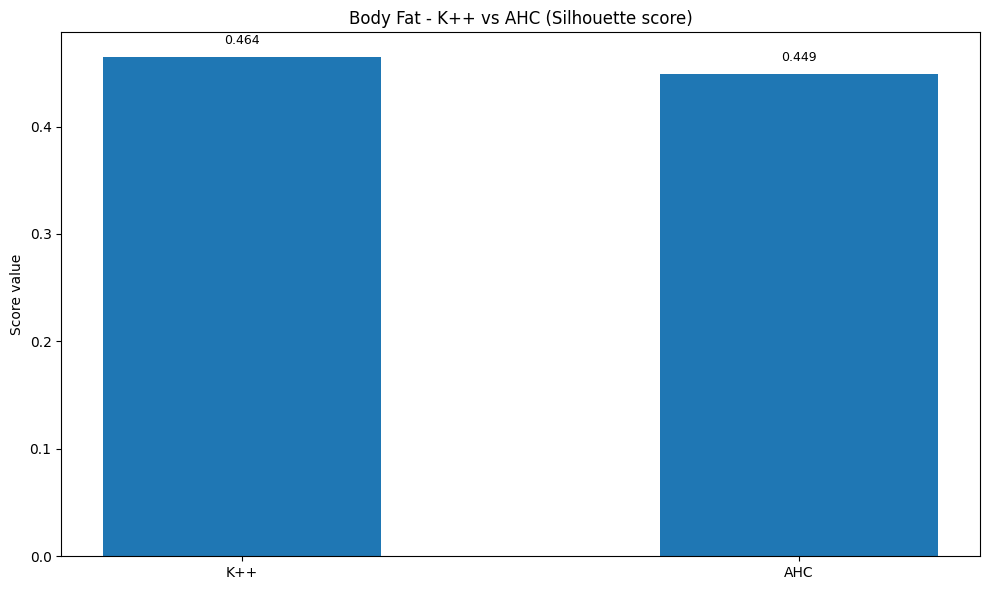

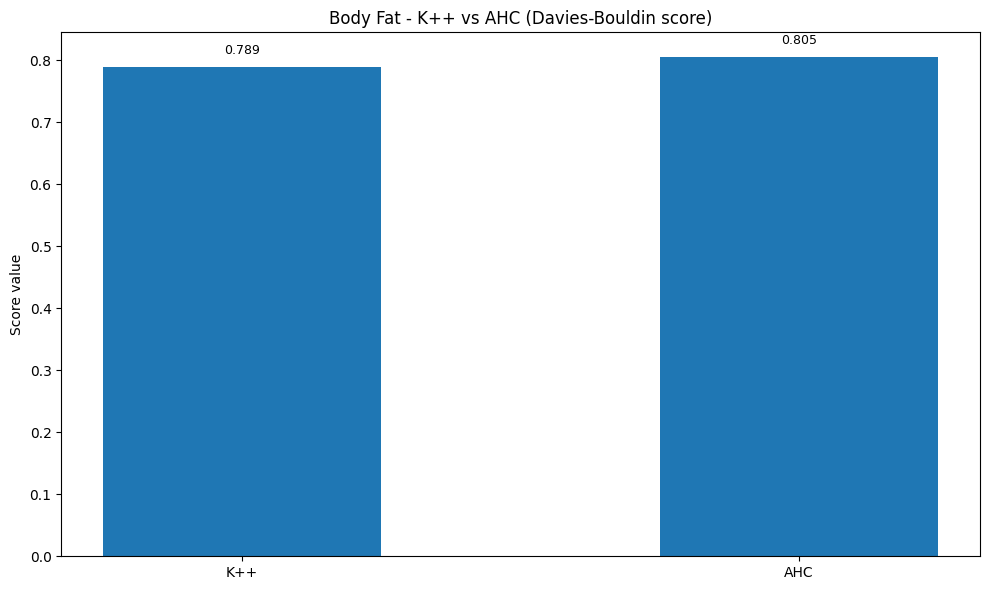

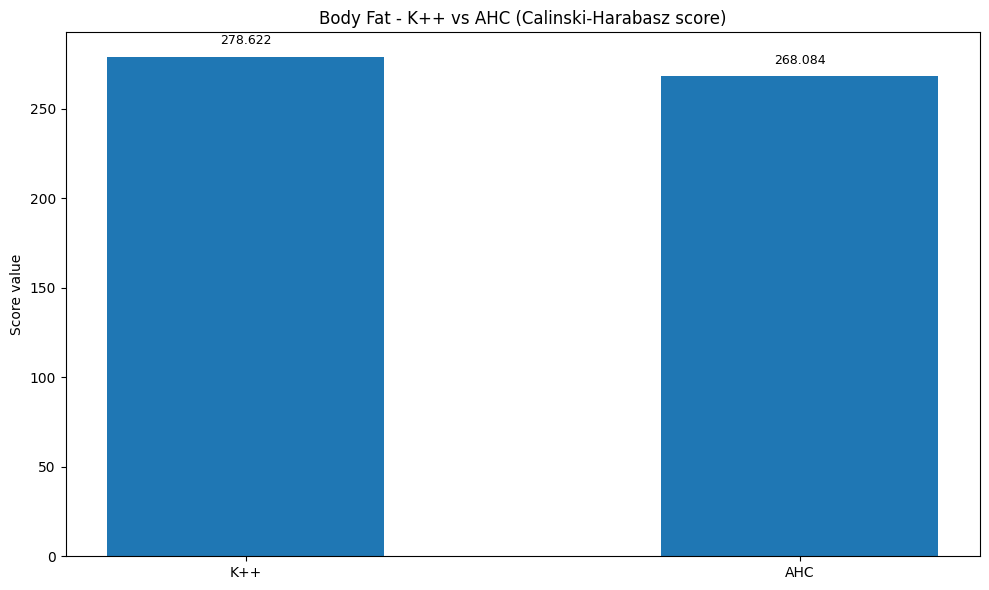

In [17]:
# Plot bar graph for visual comparison
bf_scores = {
    "Silhouette score": [kpp_sil_bf, ahc_sil_bf],
    "Davies-Bouldin score": [kpp_dbi_bf, ahc_dbi_bf],
    "Calinski-Harabasz score": [kpp_chi_bf, ahc_chi_bf]
}

bar_graph(dataset_name="Body Fat", scores=bf_scores)